# ETL/ ELT with python and mysql Task (ABDMLK)

## Installing necessary libraries

In [60]:
#!pip install google-play-scraper
#!pip install -q transformers
#!pip install textblob
#!pip install bertopic
!pip install huggingface_hub

In [36]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import matplotlib.pyplot as plt
import seaborn as sns

## Scraping data from playstore

In [ ]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
Media_Nas = reviews_all('com.maalialkhair.media',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [9]:
Media_Nas

[{'reviewId': '238748ec-e5d3-4c50-ab4f-0d97adfcb687',
  'userName': 'Imray Ahmad',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjX8RvRnqzZTb3vwQJu-nrgW2yEAEKUGsUz0V70_t90uXa1QSKOW',
  'content': 'Imran',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.2',
  'at': datetime.datetime(2024, 12, 11, 23, 31, 9),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.0.2'},
 {'reviewId': '55ce63de-28cc-44ce-96da-59b9e946480d',
  'userName': 'Tanvir TAT',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjW6rVZ4HqmqH038_csBBcWsCUvDBFte5hGw7YhJj2f_XieztR8',
  'content': 'Is very helpful',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.2',
  'at': datetime.datetime(2024, 12, 10, 14, 28, 48),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.0.2'},
 {'reviewId': '48db3b48-ef04-4de3-aa26-c87c826e0bbd',
  'userName': 'Omor',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocKMNq70QTxC74jCYIlpTEPDn

In [10]:
# convert the json data into a dataframe
Media_Nas_df = pd.json_normalize(Media_Nas)

In [11]:
Media_Nas_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,238748ec-e5d3-4c50-ab4f-0d97adfcb687,Imray Ahmad,https://play-lh.googleusercontent.com/a-/ALV-U...,Imran,5,0,1.0.2,2024-12-11 23:31:09,None,None,1.0.2
1,55ce63de-28cc-44ce-96da-59b9e946480d,Tanvir TAT,https://play-lh.googleusercontent.com/a-/ALV-U...,Is very helpful,5,0,1.0.2,2024-12-10 14:28:48,None,None,1.0.2
2,48db3b48-ef04-4de3-aa26-c87c826e0bbd,Omor,https://play-lh.googleusercontent.com/a/ACg8oc...,No family app,1,0,None,2024-12-07 23:55:17,None,None,None
3,a1d9f41c-492b-41d4-9138-8ab1aada0c70,Mehmadshersalman (Salmanali),https://play-lh.googleusercontent.com/a/ACg8oc...,Video⬇️ 📹,4,1,1.0.2,2024-11-27 06:15:37,None,None,1.0.2
4,2f1cabb2-6749-4c9c-9794-67071352aba1,NK RS,https://play-lh.googleusercontent.com/a/ACg8oc...,نواز,5,1,None,2024-11-17 13:06:19,None,None,None


In [13]:
Media_Nas_df.shape

(31, 11)

## Sentiment Analysis

Getting the necessary model for the sentiment analysis, loading the pipeline & saving the model. Furthermore reviewing the data scraped by spliting the result into sentiment and score

In [14]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = r"C:\Users\ABDMLK\Documents\DSFP DC\Python Class"  # Directory to save the model

In [15]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

Device set to use cpu
Device set to use cpu


In [16]:
# Test the reused model 
# play with the parameter and see if it works

result = sentiment_analysis_reuse("ABDMLK is going places")
print(result)

[{'label': 'POSITIVE', 'score': 0.9979540109634399}]


In [25]:
# Removing wildcharacter and cleaning the content column by casting to a str
Media_Nas_df['content_new']= Media_Nas_df['content'].astype('str')
Media_Nas_df['result'] =Media_Nas_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [24]:
Media_Nas_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result,sentiment
0,238748ec-e5d3-4c50-ab4f-0d97adfcb687,Imray Ahmad,https://play-lh.googleusercontent.com/a-/ALV-U...,Imran,0.980853,0,1.0.2,2024-12-11 23:31:09,None,None,1.0.2,Imran,"[{'label': 'POSITIVE', 'score': 0.980852663516...",POSITIVE
1,55ce63de-28cc-44ce-96da-59b9e946480d,Tanvir TAT,https://play-lh.googleusercontent.com/a-/ALV-U...,Is very helpful,0.998501,0,1.0.2,2024-12-10 14:28:48,None,None,1.0.2,Is very helpful,"[{'label': 'POSITIVE', 'score': 0.998500704765...",POSITIVE
2,48db3b48-ef04-4de3-aa26-c87c826e0bbd,Omor,https://play-lh.googleusercontent.com/a/ACg8oc...,No family app,0.999096,0,None,2024-12-07 23:55:17,None,None,None,No family app,"[{'label': 'NEGATIVE', 'score': 0.999095678329...",NEGATIVE
3,a1d9f41c-492b-41d4-9138-8ab1aada0c70,Mehmadshersalman (Salmanali),https://play-lh.googleusercontent.com/a/ACg8oc...,Video⬇️ 📹,0.995238,1,1.0.2,2024-11-27 06:15:37,None,None,1.0.2,Video⬇️ 📹,"[{'label': 'POSITIVE', 'score': 0.995237708091...",POSITIVE
4,2f1cabb2-6749-4c9c-9794-67071352aba1,NK RS,https://play-lh.googleusercontent.com/a/ACg8oc...,نواز,0.967917,1,None,2024-11-17 13:06:19,None,None,None,نواز,"[{'label': 'NEGATIVE', 'score': 0.967916607856...",NEGATIVE


In [21]:
# Spliting the result into sentiment and score
Media_Nas_df['sentiment'] = Media_Nas_df['result'].apply(lambda x: (x[0]['label']))
Media_Nas_df['score'] = Media_Nas_df['result'].apply(lambda x: (x[0]['score']))

In [22]:
Media_Nas_df[['content','score','sentiment']]

,content,score,sentiment
0,Imran,0.980853,POSITIVE
1,Is very helpful,0.998501,POSITIVE
2,No family app,0.999096,NEGATIVE
3,Video⬇️ 📹,0.995238,POSITIVE
4,نواز,0.967917,NEGATIVE
5,Very slowly working and I can't anything properly,0.999496,NEGATIVE
6,Great make messages to bulit in app to revive ...,0.998763,POSITIVE
7,Nice,0.997769,POSITIVE
8,This app need optimization took alots of mobil...,0.998813,NEGATIVE
9,best app for social media interaction,0.998566,POSITIVE


### Objective 01: Checking the distribution of the positive & negative sentiments of the apk

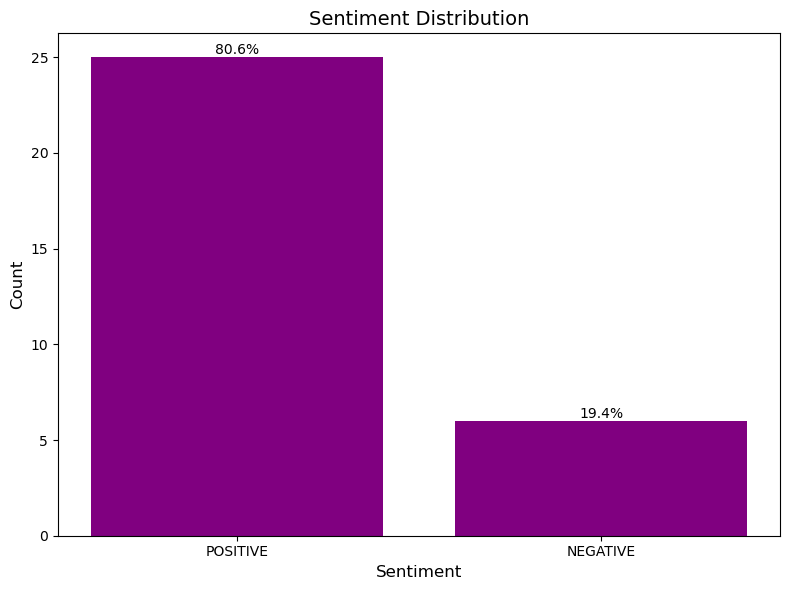

In [34]:
# Distribution of the sentiments of the apk

# Calculate value counts and percentages
value_counts = Media_Nas_df['sentiment'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts, color='purple')

# Add data labels with percentages
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{percentage:.1f}%', ha='center', va='bottom')

# Add titles and labels
plt.title('Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

The visualization depicts the sentiment for this application (Media Nas), has more positive review (81%) compared to negative (19%)

### Objective 2: Thumbs Up Count vs Sentiment

Examine whether positive reviews tend to receive more thumbs-ups (thumbsUpCount)

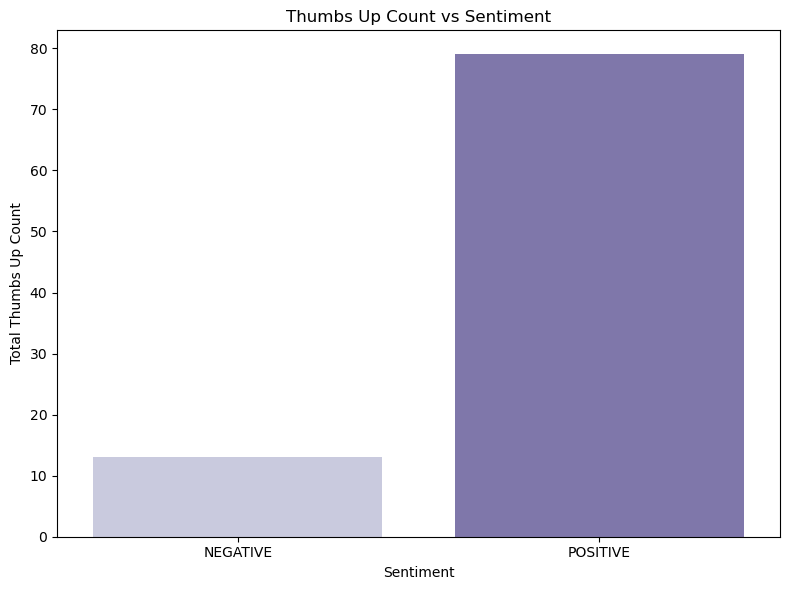

In [47]:
#
# Group data by sentiment and sum thumbs up counts
thumbs_up_summary = Media_Nas_df.groupby('sentiment')['thumbsUpCount'].sum().reset_index()


# Bar chart for thumbs up count vs sentiment
plt.figure(figsize=(8, 6))
sns.barplot(data=thumbs_up_summary, x='sentiment', y='thumbsUpCount', hue='sentiment', palette='Purples', legend=False)
    
plt.title('Thumbs Up Count vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Total Thumbs Up Count')
plt.tight_layout()
plt.show()

### Objective 3: Version-Based Sentiment Analysis

Comparing sentiment (positive & negative) for different app versions.

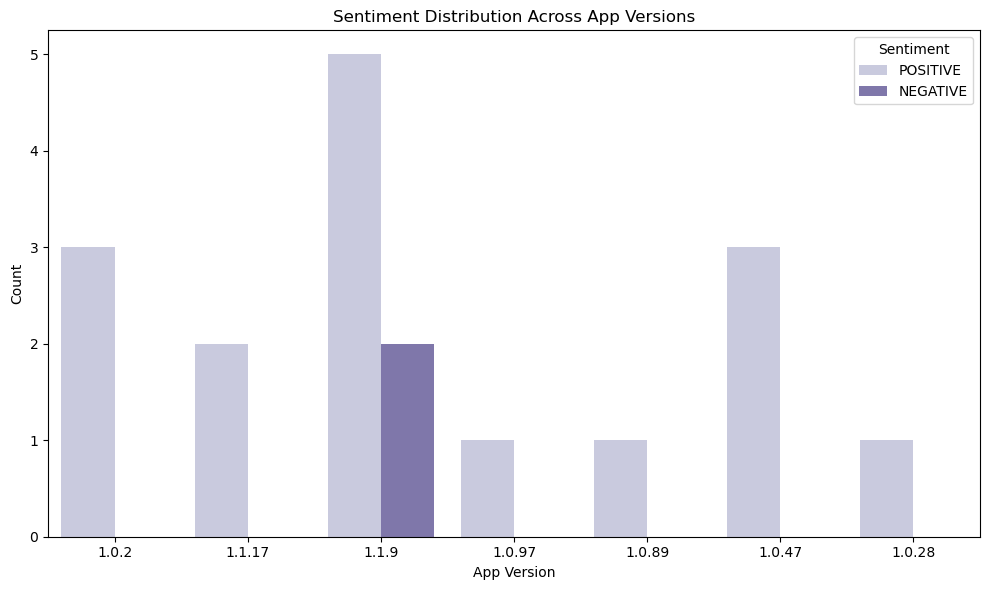

In [49]:
# Visualization:Sentiment Distribution Across App Versions
plt.figure(figsize=(10, 6))
sns.countplot(data=Media_Nas_df, x='appVersion', hue='sentiment', palette='Purples')
plt.title('Sentiment Distribution Across App Versions')
plt.xlabel('App Version')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Topic modeling

In [51]:
# Generate a series for the reviews
feature_google=Media_Nas_df['content']
print(feature_google.size)
feature_google.head()

31


0              Imran
1    Is very helpful
2      No family app
3          Video⬇️ 📹
4               نواز
Name: content, dtype: object

In [55]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())

0              Imran
1    Is very helpful
2      No family app
3          Video⬇️ 📹
4               نواز
Name: content, dtype: object


In [64]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [97]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,31,-1_app_very_in_nice,"[app, very, in, nice, and, this, to, is, it, g...",[Great make messages to bulit in app to revive...


In [71]:
# View topic keywords
for topic_num in range(5):  # Check first 5 topics
    print(f"Topic {topic_num}: {topic_model.get_topic(topic_num)}")

Topic 0: False
Topic 1: False
Topic 2: False
Topic 3: False
Topic 4: False


Apparently thus is the result of the topic modelling; Mostly Empty Topics and No Meaningful Patterns Found;
The model may not have identified meaningful topics due to short text reviews, insufficient data, or lack of distinct patterns in the dataset.

In [101]:
# the data to excel
output_file = 'playstore_rev.xlsx'
Media_Nas_df.to_excel(output_file, index=False)

## Connecting to MySQL

In [72]:
!pip install mysql-connector-python --upgrade


   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    ---------------

### ETL of the app review

In [102]:
# Normalizing dataframe
dataframe=Media_Nas_df
data = [tuple(row) for row in Media_Nas_df.to_numpy()]

In [76]:
# Checking if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [77]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )


In [78]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [83]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': 'apeiron',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """
    
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Database 'playstore_reviews' does not exist. Creating it...
Database 'playstore_reviews' created successfully!
Table `playstore_reviews` created successfully!
31 rows inserted/updated successfully!
MySQL connection closed.


In [95]:
df = pd.read_excel('playstore_rev.xlsx')